<a href="https://colab.research.google.com/github/nilatiara/KomputasiPararel/blob/main/DeteksiParu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from google.colab import drive
import matplotlib.pyplot as plt

In [5]:
file_path = '/content/drive/MyDrive/Semester 5/Komputasi Pararel/Tugas 2/predic_tabel.csv'
data = pd.read_csv(file_path).sample(50, random_state=42)

In [6]:
label_encoders = {}
for column in data.columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [7]:
X = data.drop(columns=['Hasil'])
y = data['Hasil']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
lr_model = LogisticRegression(random_state=42, max_iter=1000)

In [10]:
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [12]:
y_pred_dt = dt_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_lr = lr_model.predict(X_test)

In [14]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr)

In [15]:
print("Decision Tree Accuracy:", accuracy_dt)
print("Decision Tree Report:\n", report_dt)
print("\nRandom Forest Accuracy:", accuracy_rf)
print("Random Forest Report:\n", report_rf)
print("\nLogistic Regression Accuracy:", accuracy_lr)
print("Logistic Regression Report:\n", report_lr)


Decision Tree Accuracy: 0.9333333333333333
Decision Tree Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.95      0.90      0.92        15
weighted avg       0.94      0.93      0.93        15


Random Forest Accuracy: 1.0
Random Forest Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15


Logistic Regression Accuracy: 0.9333333333333333
Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.80      0

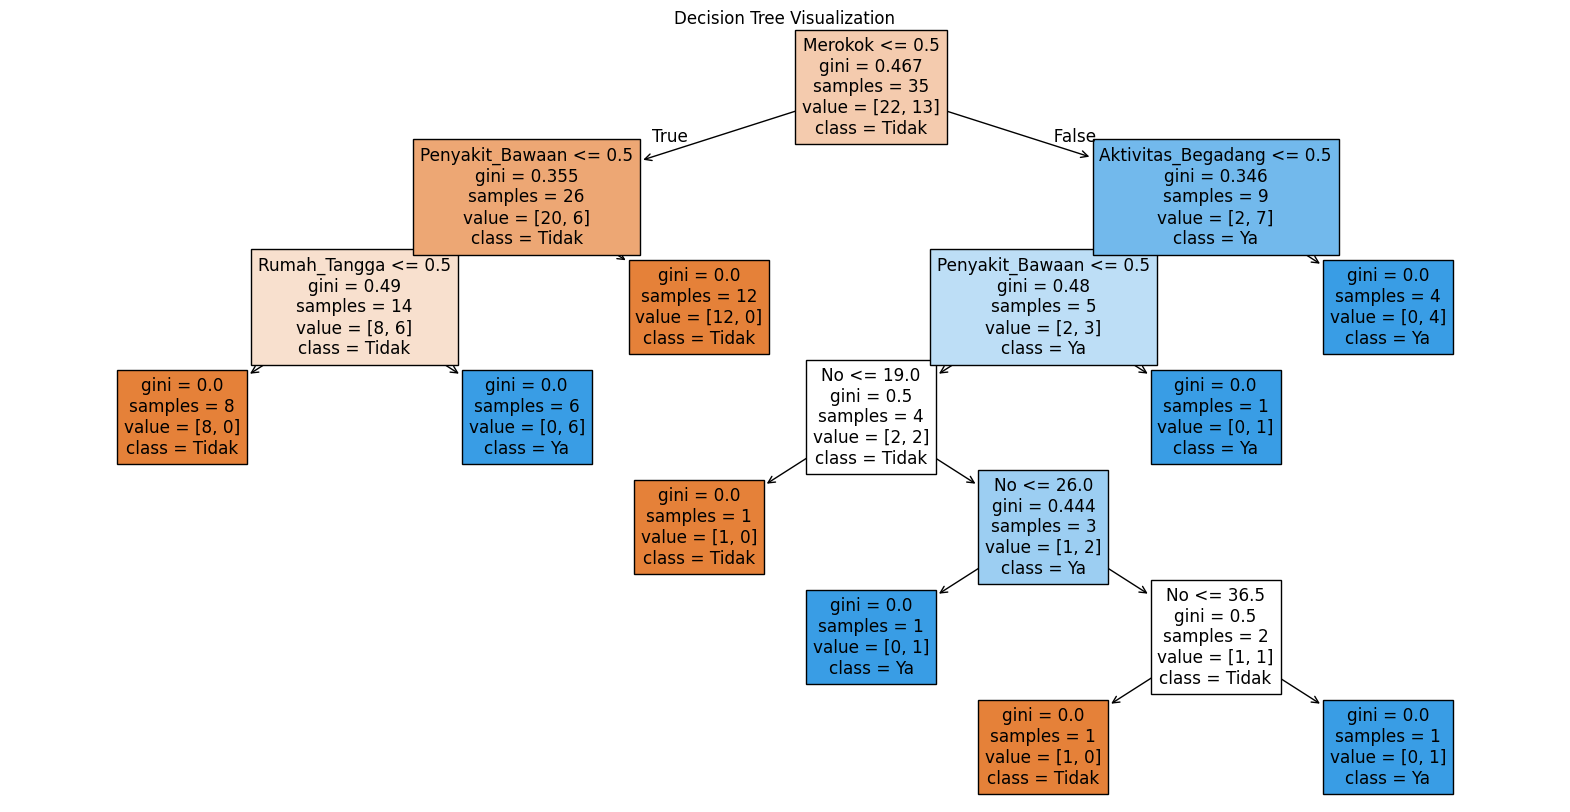

In [16]:
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=label_encoders['Hasil'].classes_, filled=True)
plt.title("Decision Tree Visualization")
plt.show()